# **DELETION**

In [ ]:
import shutil

shutil.rmtree('/content/Choledoch_RGB')

# **INIT AND PRE-PROCESSING**

In [ ]:
# Step 1.1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
from tqdm.notebook import tqdm

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/Choledoch_RGB.zip'
extraction_path = '/content'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file with a progress bar
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the total number of files
    total_files = len(zip_ref.namelist())

    # Use tqdm to create a progress bar
    for file in tqdm(zip_ref.namelist(), total=total_files, desc="Extracting"):
        zip_ref.extract(file, extraction_path)

print("Dataset extracted successfully.")


Extracting:   0%|          | 0/885 [00:00<?, ?it/s]

Dataset extracted successfully.


Class 'L' has 998 images.
Class 'N' has 998 images.
Class 'P' has 998 images.


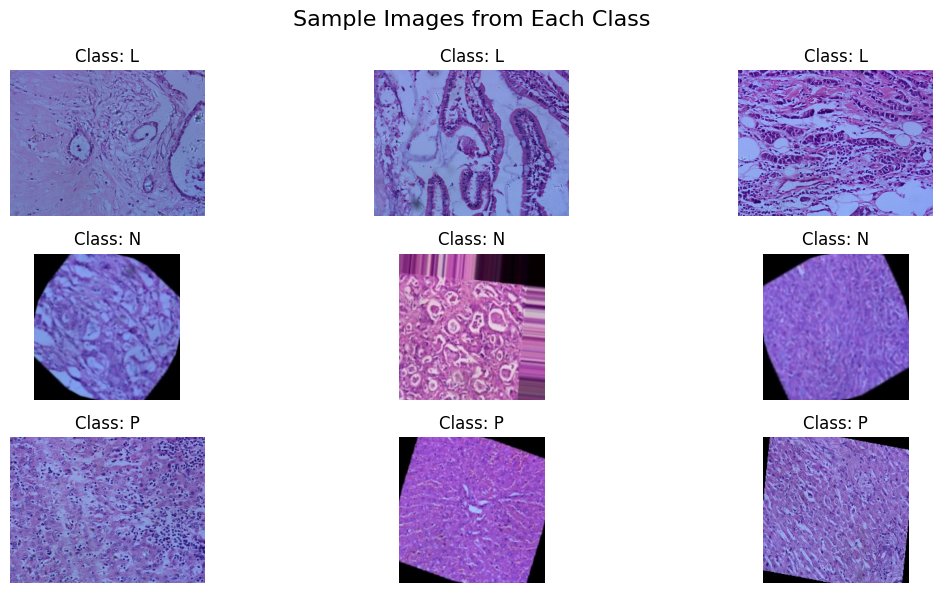

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to each class
base_dir = '/content/Choledoch_RGB'
class_dirs = {
    'L': os.path.join(base_dir, 'L'),
    'N': os.path.join(base_dir, 'N'),
    'P': os.path.join(base_dir, 'P')
}

# Count the number of images in each class
for class_name, path in class_dirs.items():
    num_images = len(os.listdir(path))
    print(f"Class '{class_name}' has {num_images} images.")

# Display a few images from each class
def display_sample_images(class_dirs, num_images=3):
    """Display sample images from each class."""
    fig, axes = plt.subplots(len(class_dirs), num_images, figsize=(12, 6))
    fig.suptitle("Sample Images from Each Class", fontsize=16)

    for i, (class_name, path) in enumerate(class_dirs.items()):
        images = os.listdir(path)[:num_images]
        for j, img_name in enumerate(images):
            img = plt.imread(os.path.join(path, img_name))
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"Class: {class_name}")
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Display images
display_sample_images(class_dirs)


In [ ]:
import os

# Define the path to the extracted dataset
data_path = '/content/Choledoch_RGB/'

# Set up paths to each class
class_names = ['L', 'N', 'P']
class_paths = {class_name: os.path.join(data_path, class_name) for class_name in class_names}

# Count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Print the counts of images in each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")


Class 'L' has 998 images.
Class 'N' has 998 images.
Class 'P' has 998 images.


In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm.notebook import tqdm

# Target number of images per class to balance
target_count = max(image_counts.values())
target_size = (224, 224)
# Augmentation transformations
def augment_image(image):
    # Apply random transformations
    rows, cols, _ = image.shape
    # Random rotation between -15 and 15 degrees
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), random.uniform(-15, 15), 1)
    image = cv2.warpAffine(image, M, (cols, rows))
    # Random horizontal flip
    if random.random() > 0.5:
        image = cv2.flip(image, 1)
    # Random zoom
    zoom_factor = random.uniform(0.9, 1.1)
    image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)
    return cv2.resize(image, target_size)

# Augment images for each class until they reach the target count
for class_name, class_path in class_paths.items():
    current_count = image_counts[class_name]
    # Initialize the progress bar
    with tqdm(total=target_count - current_count, desc=f"Augmenting {class_name}", unit="img") as pbar:
        while current_count < target_count:
            # Randomly choose an image from the class to augment
            img_file = random.choice(os.listdir(class_path))
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)

            if img is not None:
                # Apply augmentation
                aug_img = augment_image(img)

                # Save the augmented image
                new_filename = f"{class_name}_aug_{current_count}.jpg"
                cv2.imwrite(os.path.join(class_path, new_filename), aug_img)

                current_count += 1
                pbar.update(1)  # Update progress bar for each augmentation

print("Data augmentation complete. Each class should now have a similar number of images.")


Augmenting L: 0img [00:00, ?img/s]

Augmenting N: 0img [00:00, ?img/s]

Augmenting P: 0img [00:00, ?img/s]

Data augmentation complete. Each class should now have a similar number of images.


In [ ]:
import os

# Define the path to the extracted dataset
data_path = '/content/Choledoch_RGB/'

# Set up paths to each class
class_names = ['L', 'N', 'P']
class_paths = {class_name: os.path.join(data_path, class_name) for class_name in class_names}

# Count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Print the counts of images in each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")


Class 'L' has 998 images.
Class 'N' has 998 images.
Class 'P' has 998 images.


In [ ]:
# Define the path to the extracted dataset
data_path = '/content/Choledoch_RGB/'

# Set up paths to each class
class_names = ['L', 'N', 'P']
class_paths = {class_name: os.path.join(data_path, class_name) for class_name in class_names}

# Count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Target number of images per class
target_count = 1000  # You can adjust this as needed
target_size = (224, 224)


# Augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment images for each class until they reach the target count
for class_name, class_path in class_paths.items():
    current_count = image_counts[class_name]
    # Initialize the progress bar
    with tqdm(total=target_count - current_count, desc=f"Augmenting {class_name}", unit="img") as pbar:
        while current_count < target_count:
            # Randomly choose an image from the class to augment
            img_file = random.choice(os.listdir(class_path))
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)
                img = np.expand_dims(img, axis=0)  # Add batch dimension

                # Generate augmented images
                for batch in datagen.flow(img, batch_size=1, save_to_dir=class_path,
                                          save_prefix=f"{class_name}_aug", save_format="jpg"):
                    current_count += 1
                    pbar.update(1)  # Update progress bar for each augmentation
                    if current_count >= target_count:
                        break

print("Data augmentation complete. Each class should now have a similar number of images.")

# Re-count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Print the counts of images in each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Augmenting L:   0%|          | 0/2 [00:00<?, ?img/s]

Augmenting N:   0%|          | 0/2 [00:00<?, ?img/s]

Augmenting P:   0%|          | 0/2 [00:00<?, ?img/s]

Data augmentation complete. Each class should now have a similar number of images.
Class 'L' has 999 images.
Class 'N' has 1000 images.
Class 'P' has 1000 images.


In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm.notebook import tqdm

# Target number of images per class to balance
target_count = max(image_counts.values())
target_size = (224, 224)
# Augmentation transformations
def augment_image(image):
    # Apply random transformations
    rows, cols, _ = image.shape
    # Random rotation between -15 and 15 degrees
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), random.uniform(-15, 15), 1)
    image = cv2.warpAffine(image, M, (cols, rows))
    # Random horizontal flip
    if random.random() > 0.5:
        image = cv2.flip(image, 1)
    # Random zoom
    zoom_factor = random.uniform(0.9, 1.1)
    image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)
    return cv2.resize(image, target_size)

# Augment images for each class until they reach the target count
for class_name, class_path in class_paths.items():
    current_count = image_counts[class_name]
    # Initialize the progress bar
    with tqdm(total=target_count - current_count, desc=f"Augmenting {class_name}", unit="img") as pbar:
        while current_count < target_count:
            # Randomly choose an image from the class to augment
            img_file = random.choice(os.listdir(class_path))
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)

            if img is not None:
                # Apply augmentation
                aug_img = augment_image(img)

                # Save the augmented image
                new_filename = f"{class_name}_aug_{current_count}.jpg"
                cv2.imwrite(os.path.join(class_path, new_filename), aug_img)

                current_count += 1
                pbar.update(1)  # Update progress bar for each augmentation

print("Data augmentation complete. Each class should now have a similar number of images.")


Augmenting L:   0%|          | 0/1 [00:00<?, ?img/s]

Augmenting N: 0img [00:00, ?img/s]

Augmenting P: 0img [00:00, ?img/s]

Data augmentation complete. Each class should now have a similar number of images.


In [ ]:
import os

# Define the path to the extracted dataset
data_path = '/content/Choledoch_RGB/'

# Set up paths to each class
class_names = ['L', 'N', 'P']
class_paths = {class_name: os.path.join(data_path, class_name) for class_name in class_names}

# Count the number of images in each class
image_counts = {class_name: len(os.listdir(class_path)) for class_name, class_path in class_paths.items()}

# Print the counts of images in each class
for class_name, count in image_counts.items():
    print(f"Class '{class_name}' has {count} images.")


Class 'L' has 1000 images.
Class 'N' has 1000 images.
Class 'P' has 1000 images.


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import os

# Define the target size for resizing
target_size = (224, 224)

# Function to load and preprocess images
def load_images(class_names, class_paths):
    images = []
    labels = []

    for class_name in class_names:
        class_path = class_paths[class_name]
        # Use tqdm to show a progress bar
        for image_file in tqdm(os.listdir(class_path), desc=f"Processing {class_name} images"):
            # Load the image
            img_path = os.path.join(class_path, image_file)
            img = cv2.imread(img_path)

            if img is not None:
                # Resize the image
                img = cv2.resize(img, target_size)
                # Normalize pixel values to [0, 1] and convert to float32
                img = img.astype(np.float32) / 255.0

                # Append the image and label
                images.append(img)
                labels.append(class_name)

    # Convert lists to numpy arrays
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)

    return images, labels

# Load and preprocess images
images, labels = load_images(class_names, class_paths)

# Display the shape of the images and labels
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Processing L images:   0%|          | 0/1000 [00:00<?, ?it/s]

Processing N images:   0%|          | 0/1000 [00:00<?, ?it/s]

Processing P images:   0%|          | 0/1000 [00:00<?, ?it/s]

Images shape: (3000, 224, 224, 3)
Labels shape: (3000,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert to one-hot encoding
labels_one_hot = to_categorical(labels_encoded)

# Display the shape of the one-hot encoded labels
print("One-hot encoded labels shape:", labels_one_hot.shape)


One-hot encoded labels shape: (3000, 3)


In [ ]:

# Split the dataset into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (2400, 224, 224, 3) (2400, 3)
Validation set shape: (300, 224, 224, 3) (300, 3)
Test set shape: (300, 224, 224, 3) (300, 3)


# **PJT(RESNET50)**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the ResNet model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)  # Change from Flatten to GlobalAveragePooling2D
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)  # Output layer for multi-class classification

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/PJT_MODELS/resnet50_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.4681 - loss: 1.0493 - val_accuracy: 0.6288 - val_loss: 0.8788
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.5659 - loss: 0.9635 - val_accuracy: 0.5117 - val_loss: 0.8662
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.6528 - loss: 0.8253 - val_accuracy: 0.6388 - val_loss: 0.7615
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.6554 - loss: 0.8110 - val_accuracy: 0.7258 - val_loss: 0.7146
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.6796 - loss: 0.7612 - val_accuracy: 0.7291 - val_loss: 0.6721
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.6913 - loss: 0.7448 - val_accuracy: 0.7157 - val_loss: 0.6744
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7283 - loss: 0.6790 - val_accuracy: 0.7358 - val_loss: 0.6482
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7448 - loss: 0.6275 - v

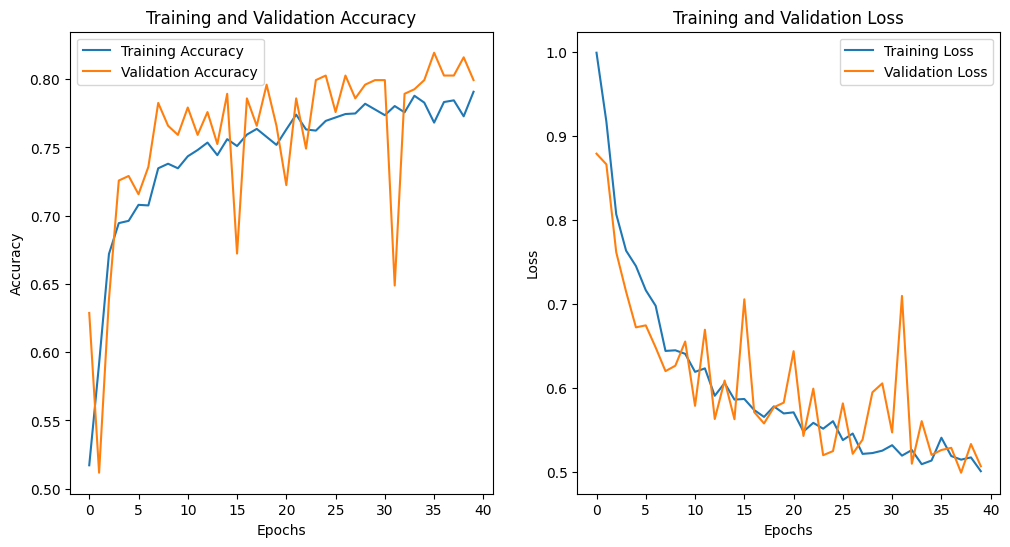

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7949 - loss: 0.4754
Test Loss: 0.4674488604068756
Test Accuracy: 0.7993311285972595


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


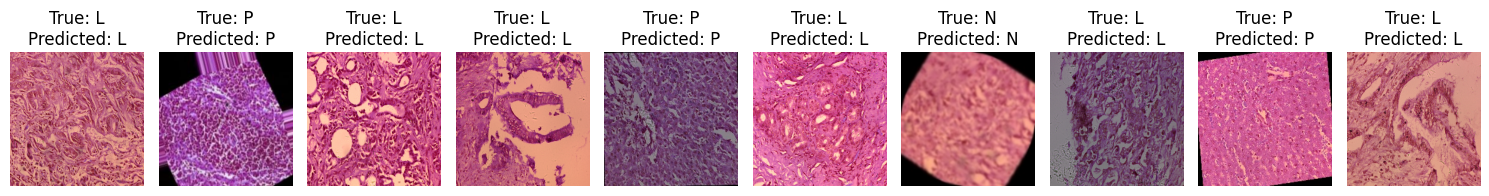

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
              precision    recall  f1-score   support

           L       0.87      0.94      0.90       108
           N       0.80      0.74      0.77        95
           P       0.71      0.71      0.71        96

    accuracy                           0.80       299
   macro avg       0.79      0.79      0.79       299
weighted avg       0.80      0.80      0.80       299



# **PJT(VGG19)**

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the VGG19 model with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,090,435 (76.64 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/PJT_MODELS/vgg19_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 187ms/step - accuracy: 0.7020 - loss: 0.7312 - val_accuracy: 0.8662 - val_loss: 0.4411
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.8399 - loss: 0.4117 - val_accuracy: 0.8829 - val_loss: 0.3572
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.8798 - loss: 0.3177 - val_accuracy: 0.8662 - val_loss: 0.3380
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.8845 - loss: 0.3023 - val_accuracy: 0.8930 - val_loss: 0.3106
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8989 - loss: 0.2713 - val_accuracy: 0.9264 - val_loss: 0.2783
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9079 - loss: 0.2632 - val_accuracy: 0.8963 - val_loss: 0.2900
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9212 - loss: 0.2308 - val_accuracy: 0.9398 - val_loss: 0.2521
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.9113 - loss: 0.2342 -

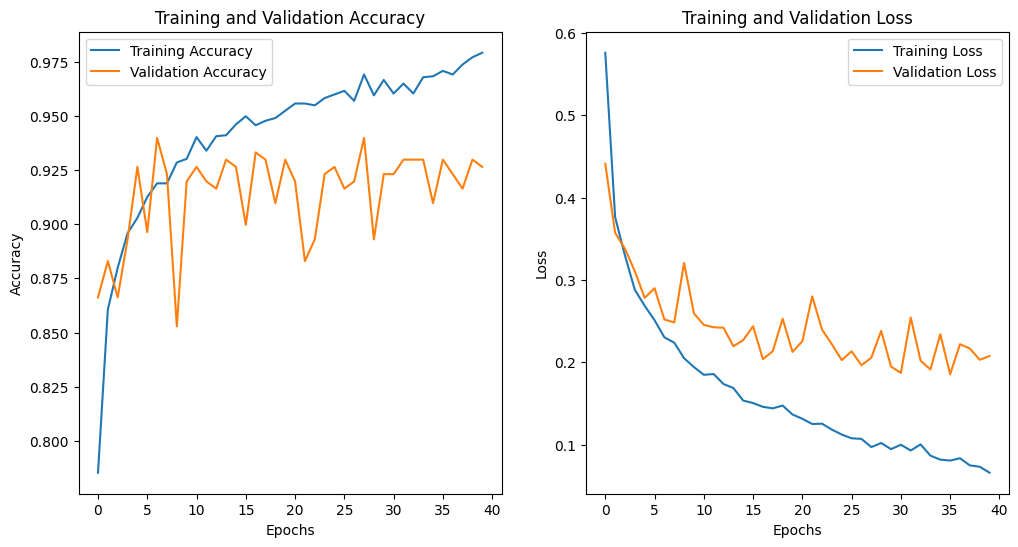

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9066 - loss: 0.1759
Test Loss: 0.1735476404428482
Test Accuracy: 0.9197324514389038


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


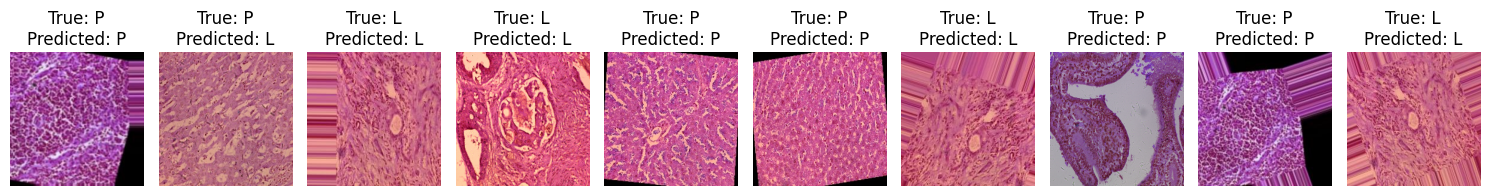

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step
              precision    recall  f1-score   support

           L       0.92      0.94      0.93       108
           N       0.90      0.95      0.92        95
           P       0.94      0.88      0.91        96

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



# **PJT(MobileNetV2)**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Display the model summary
model.summary()


<ipython-input-42-f1c004d9a182>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/PJT_MODELS/mobilenetv2_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.8222 - loss: 0.4758 - val_accuracy: 0.9097 - val_loss: 0.2829
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9515 - loss: 0.1409 - val_accuracy: 0.9431 - val_loss: 0.1901
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9625 - loss: 0.1062 - val_accuracy: 0.9264 - val_loss: 0.2200
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9703 - loss: 0.0768 - val_accuracy: 0.9197 - val_loss: 0.2614
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9767 - loss: 0.0608 - val_accuracy: 0.9431 - val_loss: 0.2372
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9836 - loss: 0.0464 - val_accuracy: 0.9398 - val_loss: 0.2095
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9880 - loss: 0.0329 - val_accuracy: 0.9532 - val_loss: 0.1832
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9916 - loss: 0.0259 - val_a

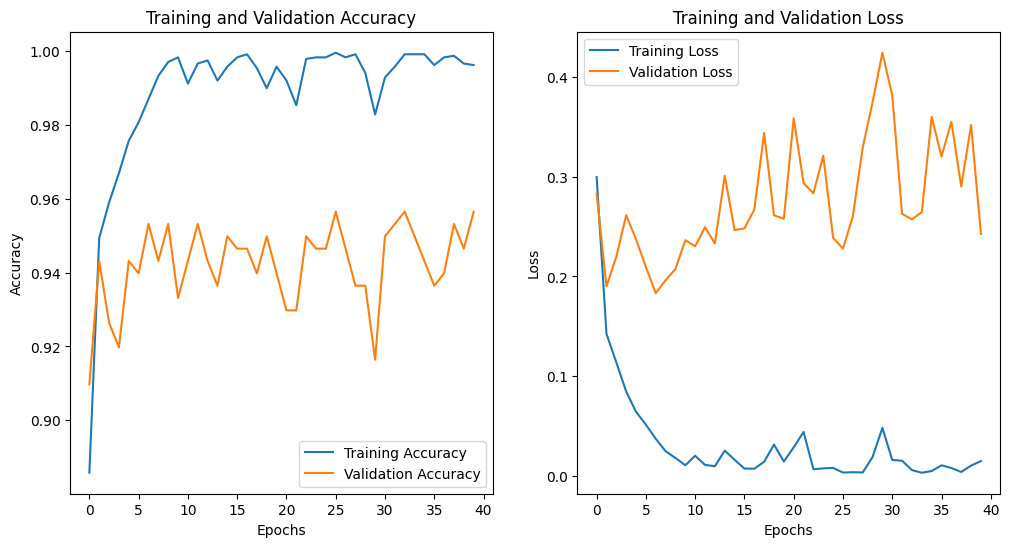

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9583 - loss: 0.1030
Test Loss: 0.15716922283172607
Test Accuracy: 0.9498327970504761


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


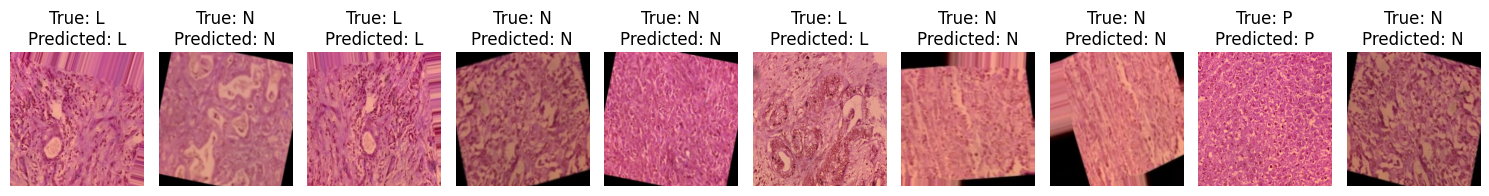

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step
              precision    recall  f1-score   support

           L       0.94      0.94      0.94       108
           N       0.95      0.96      0.95        95
           P       0.96      0.95      0.95        96

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



# **PJT(EfficientNet B3)**

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the EfficientNetB3 model with pre-trained weights
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Display the model summary
model.summary()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 40)   │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 40)   │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 40)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 40)   │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 40)   │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 40)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 10,980,658 (41.89 MB)

 Trainable params: 197,123 (770.01 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)

model.save('/content/drive/MyDrive/PJT_MODELS/efficientnetb3_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 97s 358ms/step - accuracy: 0.3416 - loss: 1.1323 - val_accuracy: 0.2876 - val_loss: 1.1035
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.3594 - loss: 1.0960 - val_accuracy: 0.3445 - val_loss: 1.0919
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.3482 - loss: 1.0944 - val_accuracy: 0.5719 - val_loss: 1.0881
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.3938 - loss: 1.0916 - val_accuracy: 0.2876 - val_loss: 1.0902
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.3715 - loss: 1.0884 - val_accuracy: 0.5084 - val_loss: 1.0752
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3989 - loss: 1.0821 - val_accuracy: 0.4983 - val_loss: 1.0648
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.3876 - loss: 1.0791 - val_accuracy: 0.4950 - val_loss: 1.0528
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.4058 - loss: 1.0774 - val_

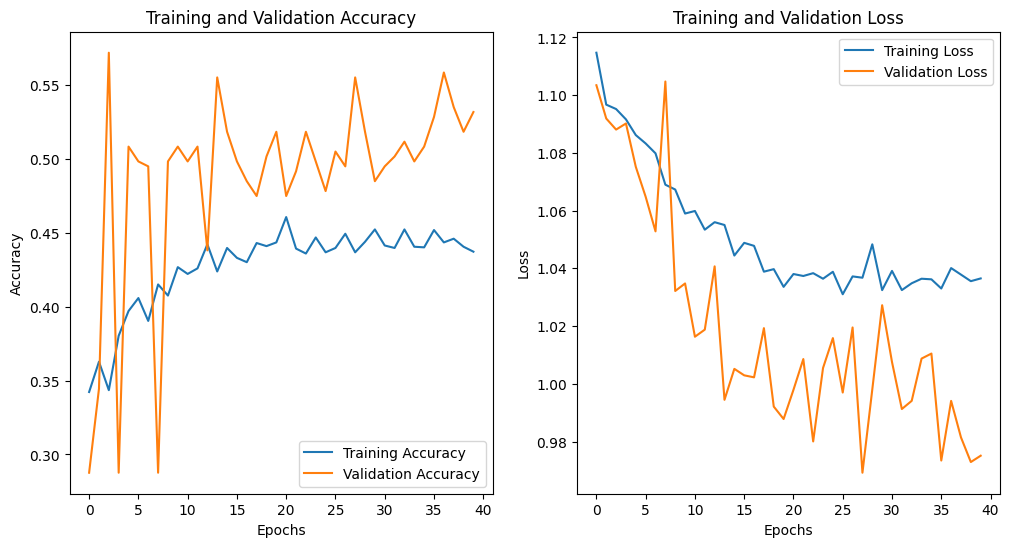

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.5722 - loss: 0.9789
Test Loss: 0.9874305129051208
Test Accuracy: 0.5284280776977539


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


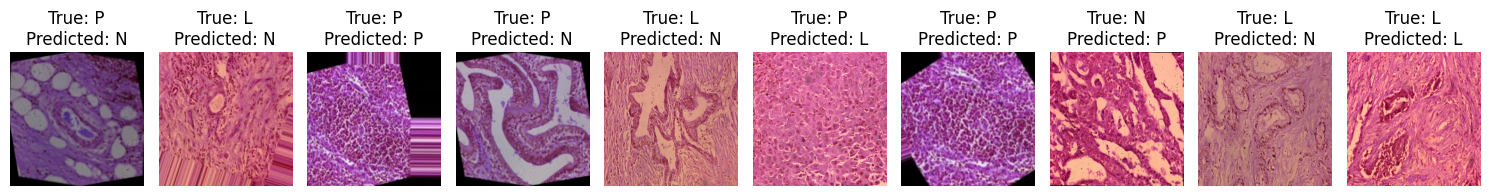

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 820ms/step
              precision    recall  f1-score   support

           L       0.63      0.31      0.42       108
           N       0.52      0.81      0.63        95
           P       0.49      0.49      0.49        96

    accuracy                           0.53       299
   macro avg       0.55      0.54      0.51       299
weighted avg       0.55      0.53      0.51       299



# **PJT(DenseNet)**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the DenseNet model with pre-trained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,169,091 (27.35 MB)

 Trainable params: 131,587 (514.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/PJT_MODELS/densenet_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 233ms/step - accuracy: 0.7955 - loss: 0.4923 - val_accuracy: 0.9164 - val_loss: 0.2617
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9143 - loss: 0.2193 - val_accuracy: 0.9197 - val_loss: 0.2153
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9463 - loss: 0.1592 - val_accuracy: 0.9264 - val_loss: 0.1789
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9487 - loss: 0.1329 - val_accuracy: 0.9331 - val_loss: 0.1751
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9566 - loss: 0.1217 - val_accuracy: 0.9666 - val_loss: 0.1076
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9741 - loss: 0.0835 - val_accuracy: 0.9197 - val_loss: 0.1967
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9617 - loss: 0.0922 - val_accuracy: 0.9565 - val_loss: 0.1389
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9757 - loss: 0.0660 - va

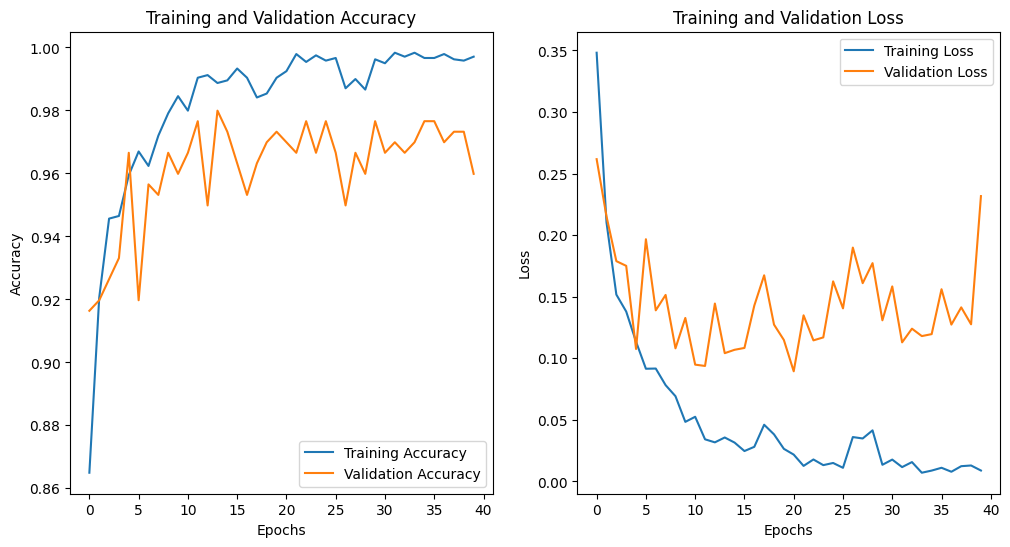

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9628 - loss: 0.1023
Test Loss: 0.09555034339427948
Test Accuracy: 0.9599999785423279


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


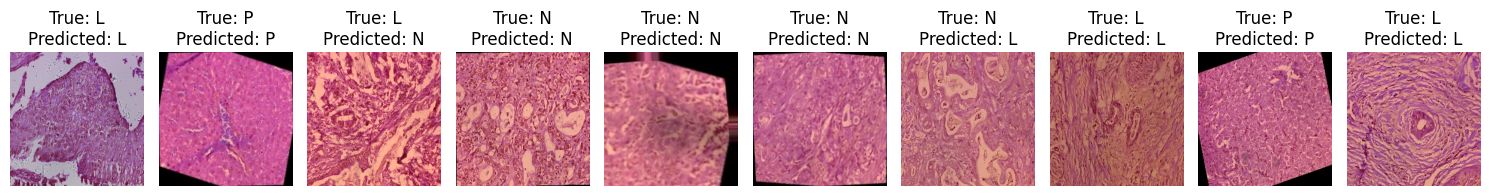

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 693ms/step
              precision    recall  f1-score   support

           L       0.98      0.95      0.96       115
           N       0.96      0.97      0.96        93
           P       0.94      0.97      0.95        92

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# **PJT(InceptionV3)**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Display the model summary
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,065,443 (84.17 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/PJT_MODELS/inceptionv3_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 158ms/step - accuracy: 0.7733 - loss: 0.5547 - val_accuracy: 0.8930 - val_loss: 0.2830
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9206 - loss: 0.2115 - val_accuracy: 0.8896 - val_loss: 0.2954
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9295 - loss: 0.1792 - val_accuracy: 0.8997 - val_loss: 0.3015
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9526 - loss: 0.1298 - val_accuracy: 0.9097 - val_loss: 0.2605
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9613 - loss: 0.1055 - val_accuracy: 0.9130 - val_loss: 0.2518
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9777 - loss: 0.0736 - val_accuracy: 0.9231 - val_loss: 0.2393
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9825 - loss: 0.0616 - val_accuracy: 0.8997 - val_loss: 0.2995
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9766 - loss: 0.0625 - val_

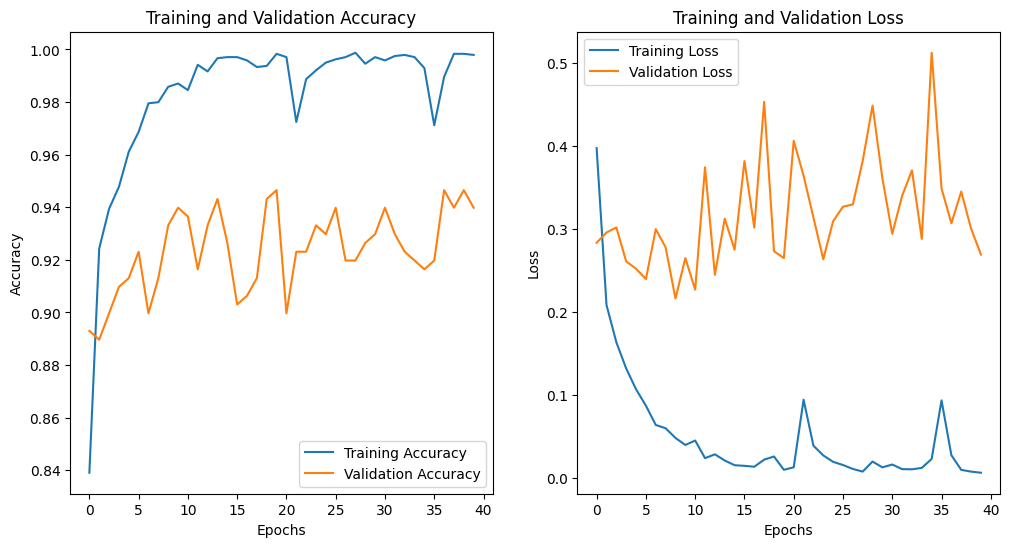

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 748ms/step - accuracy: 0.9338 - loss: 0.1814
Test Loss: 0.21172462403774261
Test Accuracy: 0.9333333373069763


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


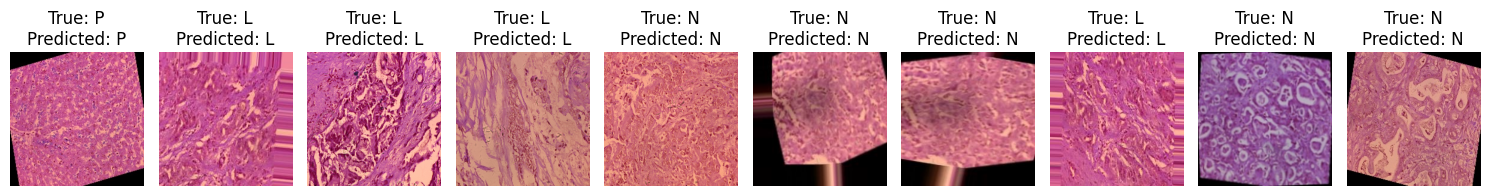

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step
              precision    recall  f1-score   support

           L       0.94      0.96      0.95       115
           N       0.93      0.95      0.94        93
           P       0.93      0.89      0.91        92

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# **PJT(Xception)**

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define input layer
input_tensor = Input(shape=(224, 224, 3))

# Initialize the Xception model with pre-trained weights
base_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 21,124,139 (80.58 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set training parameters
epochs = 40  # You can adjust the number of epochs
batch_size = 16

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience= epochs + 1,          # number of epochs to wait for improvement
    restore_best_weights=True  # restores weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],  # add the callback here
    verbose=1
)
model.save('/content/drive/MyDrive/PJT_MODELS/xception_model.h5')

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 166ms/step - accuracy: 0.8287 - loss: 0.4107 - val_accuracy: 0.9231 - val_loss: 0.2466
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9302 - loss: 0.1746 - val_accuracy: 0.9264 - val_loss: 0.2232
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9480 - loss: 0.1319 - val_accuracy: 0.9231 - val_loss: 0.2177
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9536 - loss: 0.1253 - val_accuracy: 0.9431 - val_loss: 0.1848
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9650 - loss: 0.0829 - val_accuracy: 0.8896 - val_loss: 0.3254
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9717 - loss: 0.0743 - val_accuracy: 0.9498 - val_loss: 0.1448
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9864 - loss: 0.0496 - val_accuracy: 0.9331 - val_loss: 0.2266
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9852 - loss: 0.0472 -

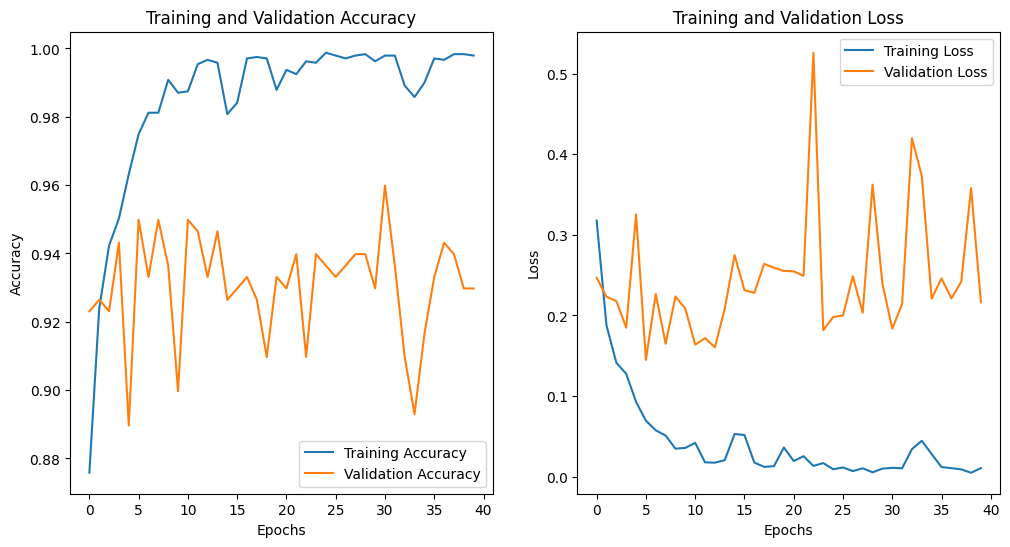

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 771ms/step - accuracy: 0.9380 - loss: 0.1576
Test Loss: 0.15874749422073364
Test Accuracy: 0.9300000071525574


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


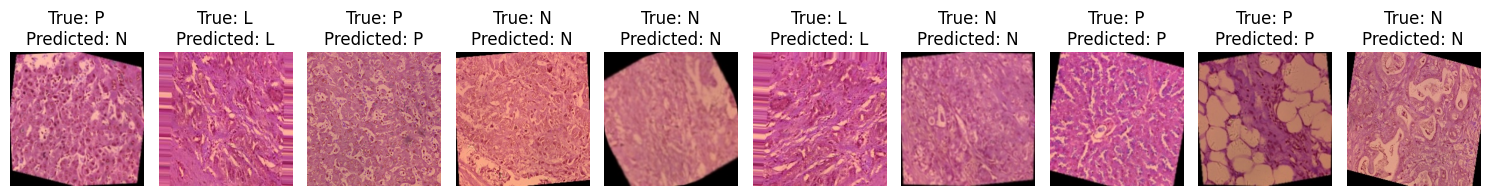

In [ ]:
# Select a few random test images
import random

# Number of images to display
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

# Prepare the figure for plotting
plt.figure(figsize=(15, 8))

for i, idx in enumerate(random_indices):
    # Get the image and its true label
    img = X_test[idx]
    true_label = label_encoder.inverse_transform([np.argmax(y_test[idx])])[0]

    # Make a prediction
    img_expanded = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img_expanded)
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

    # Display the image and prediction
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step
              precision    recall  f1-score   support

           L       0.95      0.90      0.93       115
           N       0.93      0.96      0.94        93
           P       0.91      0.93      0.92        92

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# **ENSEMBLE**

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
import tensorflow as tf

# Define the path to your saved models
model_path = '/content/drive/MyDrive/PJT_MODELS/'

# List of model names and corresponding file names
models = {
    'ResNet50': 'resnet50_model.h5',
    'VGG19': 'vgg19_model.h5',
    'MobileNetV2': 'mobilenetv2_model.h5',
    'EfficientNetB3': 'efficientnetb3_model.h5',
    'DenseNet': 'densenet_model.h5',
    'InceptionV3': 'inceptionv3_model.h5',
    'Xception': 'xception_model.h5'
}

# Assuming X_test and y_test are already defined
for model_name, model_file in models.items():
    # Step 2: Load each model
    model = tf.keras.models.load_model(model_path + model_file)

    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)  # Assuming multi-class classification
    y_test_classes = y_test.argmax(axis=1)  # Convert one-hot encoding to class labels if needed

    # Step 3: Generate classification report
    report_dict = classification_report(y_test_classes, y_pred_classes, output_dict=True)

    # Convert to DataFrame
    report_df = pd.DataFrame(report_dict).transpose()

    # Save to CSV
    csv_filename = f"/content/drive/MyDrive/PJT_MODELS/CR/{model_name}_classification_report.csv"
    report_df.to_csv(csv_filename)

    print(f"Saved classification report for {model_name} as {csv_filename}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step
Saved classification report for ResNet50 as /content/drive/MyDrive/PJT_MODELS/CR/ResNet50_classification_report.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
Saved classification report for VGG19 as /content/drive/MyDrive/PJT_MODELS/CR/VGG19_classification_report.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step
Saved classification report for MobileNetV2 as /content/drive/MyDrive/PJT_MODELS/CR/MobileNetV2_classification_report.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 833ms/step
Saved classification report for EfficientNetB3 as /content/drive/MyDrive/PJT_MODELS/CR/EfficientNetB3_classification_report.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 834ms/step
Saved classification report for DenseNet as /content/drive/MyDrive/PJT_MODELS/CR/DenseNet_classification_report.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step
Saved classification report for InceptionV3 as /content/drive/MyDrive/PJT_MODELS/CR/InceptionV3_classification_report.csv


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step
Saved classification report for Xception as /content/drive/MyDrive/PJT_MODELS/CR/Xception_classification_report.csv


In [ ]:
import tensorflow as tf

# Define the path to your saved models folder in Google Drive
model_path = '/content/drive/MyDrive/PJT_MODELS/'

# List of model names and corresponding file names
model_files = {
    'ResNet50': 'resnet50_model.h5',
    'VGG19': 'vgg19_model.h5',
    'MobileNetV2': 'mobilenetv2_model.h5',
    'EfficientNetB3': 'efficientnetb3_model.h5',
    'DenseNet': 'densenet_model.h5',
    'InceptionV3': 'inceptionv3_model.h5',
    'Xception': 'xception_model.h5'
}

# Step 2: Load each model and store in a dictionary
loaded_models = {}

for model_name, model_file in model_files.items():
    # Load the model
    model = tf.keras.models.load_model(model_path + model_file)
    loaded_models[model_name] = model
    print(f"{model_name} model loaded successfully.")

# At this point, `loaded_models` dictionary contains all 7 models, e.g., loaded_models['ResNet50'] gives you the ResNet50 model.


ResNet50 model loaded successfully.


VGG19 model loaded successfully.


MobileNetV2 model loaded successfully.


EfficientNetB3 model loaded successfully.


DenseNet model loaded successfully.


InceptionV3 model loaded successfully.


Xception model loaded successfully.


# **AVERAGING(SOFT VOTING)**

In [ ]:
import numpy as np

# Predict probabilities for each model and average them
y_pred_probs = [model.predict(X_test) for model in loaded_models.values()]
y_pred_avg = np.mean(y_pred_probs, axis=0)  # Average probabilities across models
y_pred_classes = np.argmax(y_pred_avg, axis=1)  # Final class prediction


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [ ]:
# Convert y_test to class labels if it's one-hot encoded
y_test_classes = np.argmax(y_test, axis=1)

# Step 3: Generate classification report
report_dict = classification_report(y_test_classes, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Step 4: Save the report as a CSV file in Google Drive
report_csv_path = '/content/drive/MyDrive/PJT_MODELS/ENSEMBLE_CR/SoftVoting_classification_report.csv'
report_df.to_csv(report_csv_path)

print(f"Classification report saved to {report_csv_path}")

Classification report saved to /content/drive/MyDrive/PJT_MODELS/ENSEMBLE_CR/SoftVoting_classification_report.csv


# **DYNAMIC WEIGHTED AVERAGING**

In [ ]:
import pandas as pd
import numpy as np

# Define the path to your classification reports
report_path = '/content/drive/MyDrive/PJT_MODELS/CR/'

# List of report filenames corresponding to each model
report_files = {
    'ResNet50': 'ResNet50_classification_report.csv',
    'VGG19': 'VGG19_classification_report.csv',
    'MobileNetV2': 'MobileNetV2_classification_report.csv',
    'EfficientNetB3': 'EfficientNetB3_classification_report.csv',
    'DenseNet': 'DenseNet_classification_report.csv',
    'InceptionV3': 'InceptionV3_classification_report.csv',
    'Xception': 'Xception_classification_report.csv'
}

# Step 2: Load each classification report and calculate a weight based on weighted avg F1-score
model_weights = {}

for model_name, report_file in report_files.items():
    # Load the classification report CSV
    report_df = pd.read_csv(report_path + report_file, index_col=0)

    # Extract weighted avg F1-score for the model
    weighted_f1_score = report_df.loc['weighted avg', 'f1-score']

    # Store the weighted F1-score as the weight for this model
    model_weights[model_name] = weighted_f1_score

# Step 3: Normalize weights to sum up to 1
total_weight = sum(model_weights.values())
for model_name in model_weights:
    model_weights[model_name] /= total_weight

print("Dynamically calculated model weights:", model_weights)

# Step 4: Use weights in weighted averaging ensemble
y_pred_probs = [model_weights[model_name] * loaded_models[model_name].predict(X_test)
                for model_name in loaded_models]
y_pred_weighted_avg = np.sum(y_pred_probs, axis=0)  # Weighted sum of probabilities
y_pred_classes_weighted = np.argmax(y_pred_weighted_avg, axis=1)  # Final class prediction


Dynamically calculated model weights: {'ResNet50': 0.13356357977866, 'VGG19': 0.16162327091742748, 'MobileNetV2': 0.15729605172448363, 'EfficientNetB3': 0.05301438039546492, 'DenseNet': 0.17794437181478925, 'InceptionV3': 0.16131758116008194, 'Xception': 0.15524076420909283}
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

# Step 3: Generate classification report
report_dict = classification_report(y_test_classes, y_pred_classes_weighted, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Step 4: Save the classification report as CSV in Google Drive
csv_filename = "/content/drive/MyDrive/PJT_MODELS/ENSEMBLE_CR/weighted_averaging_classification_report.csv"
report_df.to_csv(csv_filename)

print(f"Classification report saved as {csv_filename}")

Classification report saved as /content/drive/MyDrive/PJT_MODELS/ENSEMBLE_CR/weighted_averaging_classification_report.csv


# **STACKING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Generate model predictions as features
stacked_features = np.column_stack([np.argmax(model.predict(X_train), axis=1) for model in loaded_models.values()])

# Define and train meta-learner
meta_model = LogisticRegression()

y_train_1d = np.argmax(y_train, axis=1)

# Fit the meta-learner with the 1D target variable
meta_model.fit(stacked_features, y_train_1d)

# Make final predictions using the meta-learner
stacked_features_test = np.column_stack([np.argmax(model.predict(X_test), axis=1) for model in loaded_models.values()])
final_predictions_stack = meta_model.predict(stacked_features_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


In [ ]:
y_test_classes1 = np.argmax(y_test, axis=1)

report_dict = classification_report(y_test_classes1, final_predictions_stack, output_dict=True)


report_df = pd.DataFrame(report_dict).transpose()


report_df.to_csv('/content/drive/MyDrive/PJT_MODELS/ENSEMBLE_CR/stacking_classification_report.csv')

print("Classification report saved as stacking_classification_report.csv in Google Drive.")

Classification report saved as stacking_classification_report.csv in Google Drive.


# **COMPARISON**

In [ ]:
import pandas as pd


# Define the path to your saved reports folder
report_path = '/content/drive/MyDrive/PJT_MODELS/CR/'
report_path1 = '/content/drive/MyDrive/PJT_MODELS/ENSEMBLE_CR/'
# List of model names
model_names = [
    'ResNet50', 'VGG19', 'MobileNetV2', 'EfficientNetB3', 'DenseNet', 'InceptionV3', 'Xception'
]

# List of ensemble methods
ensemble_methods = ['SoftVoting', 'weighted_averaging', 'stacking']

# Initialize dictionaries to load reports
model_reports = {}
ensemble_reports = {}

# Load the classification reports for each model and ensemble method
for model in model_names:
    model_reports[model] = pd.read_csv(report_path + f'{model}_classification_report.csv', index_col=0)

for ensemble_method in ensemble_methods:
    ensemble_reports[ensemble_method] = pd.read_csv(report_path1 + f'{ensemble_method}_classification_report.csv', index_col=0)


In [ ]:
# Define the metrics we are interested in
metrics = ['precision', 'recall', 'f1-score']

# Initialize an empty dictionary to store the comparison data
comparison_data = []

# Compare each model with the ensemble methods
for model in model_names:
    model_report = model_reports[model]
    model_metrics = {metric: model_report.loc['weighted avg', metric] for metric in metrics}
    model_metrics['accuracy'] = model_report.loc['accuracy', 'precision']  # Accuracy is stored under 'precision' for the accuracy row
    model_metrics['Model'] = model
    model_metrics['Type'] = 'Model'
    comparison_data.append(model_metrics)

for ensemble_method in ensemble_methods:
    ensemble_report = ensemble_reports[ensemble_method]
    ensemble_metrics = {metric: ensemble_report.loc['weighted avg', metric] for metric in metrics}
    ensemble_metrics['accuracy'] = ensemble_report.loc['accuracy', 'precision']  # Accuracy is stored under 'precision' for the accuracy row
    ensemble_metrics['Model'] = ensemble_method
    ensemble_metrics['Type'] = 'Ensemble'
    comparison_data.append(ensemble_metrics)

# Create a DataFrame from the comparison data
comparison_df = pd.DataFrame(comparison_data)

# Step 3: Save the comparison as a CSV
comparison_df.to_csv(report_path + 'model_vs_ensemble_comparison.csv', index=False)

# Show the comparison DataFrame
comparison_df

precision    recall  f1-score  accuracy               Model      Type
0   0.722817  0.710000  0.697852  0.710000            ResNet50     Model
1   0.854330  0.846667  0.844460  0.846667               VGG19     Model
2   0.829498  0.820000  0.821851  0.820000         MobileNetV2     Model
3   0.313618  0.280000  0.276993  0.280000      EfficientNetB3     Model
4   0.930017  0.930000  0.929735  0.930000            DenseNet     Model
5   0.852152  0.846667  0.842863  0.846667         InceptionV3     Model
6   0.815500  0.816667  0.811112  0.816667            Xception     Model
7   0.909096  0.906667  0.903844  0.906667          SoftVoting  Ensemble
8   0.924784  0.923333  0.921740  0.923333  weighted_averaging  Ensemble
9   0.957102  0.956667  0.956674  0.956667            stacking  Ensemble

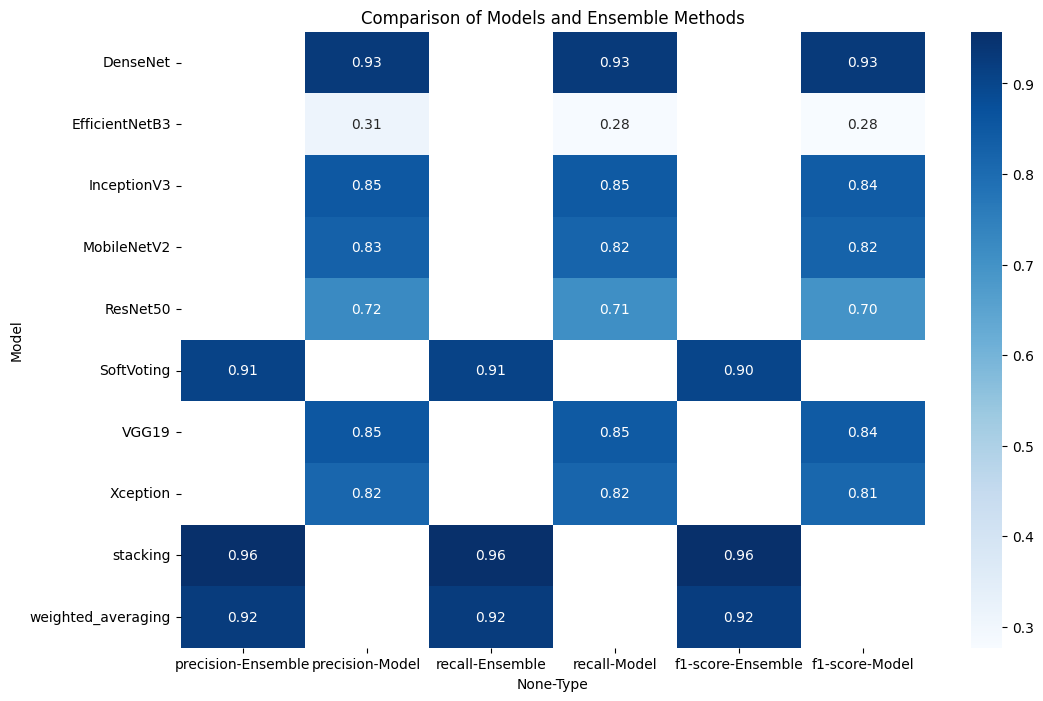

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the comparison DataFrame to have models/ensemble methods as rows and metrics as columns
comparison_pivot = comparison_df.pivot(index='Model', columns='Type', values=metrics)

# Plot the comparison
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_pivot, annot=True, cmap='Blues', fmt=".2f")
plt.title('Comparison of Models and Ensemble Methods')
plt.show()


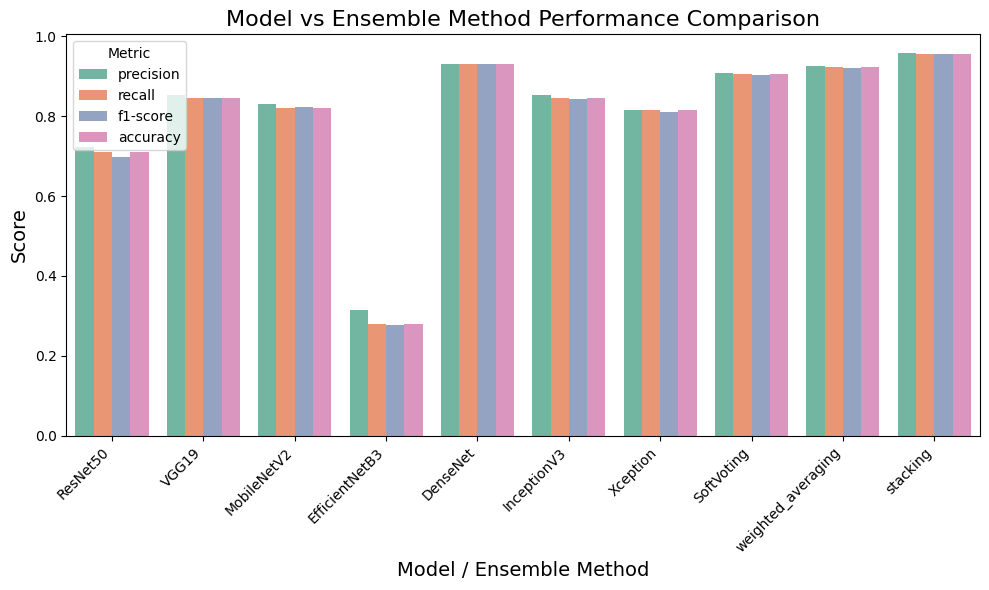

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the bar plot
plt.figure(figsize=(10, 6))

# Melt the comparison dataframe to have a column for 'Metric' and 'Score'
melted_df = comparison_df.melt(id_vars=["Model", "Type"], value_vars=["precision", "recall", "f1-score", "accuracy"],
                               var_name="Metric", value_name="Score")

# Create the bar plot
sns.barplot(data=melted_df, x="Model", y="Score", hue="Metric", palette="Set2")

# Title and labels
plt.title('Model vs Ensemble Method Performance Comparison', fontsize=16)
plt.xlabel('Model / Ensemble Method', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


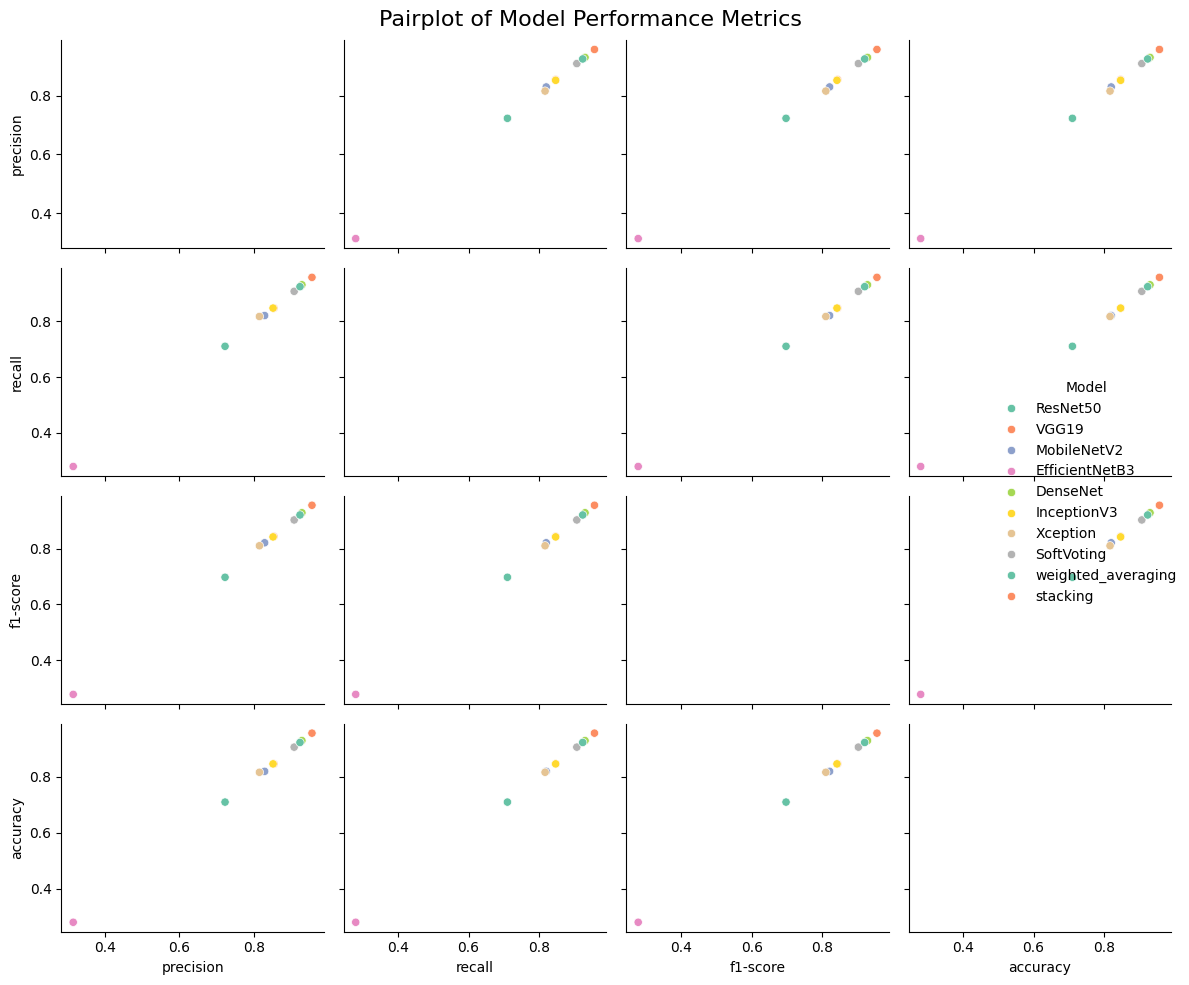

In [ ]:
# Pairplot of metrics for visualizing pairwise relationships
sns.pairplot(comparison_df[["precision", "recall", "f1-score", "accuracy", "Model"]], hue="Model", diag_kind="kde", palette="Set2")
plt.suptitle('Pairplot of Model Performance Metrics', size=16)
plt.tight_layout()
plt.show()


<ipython-input-78-c24cb15d3f41>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate_Score', y='Model', data=sorted_comparison, palette='viridis')


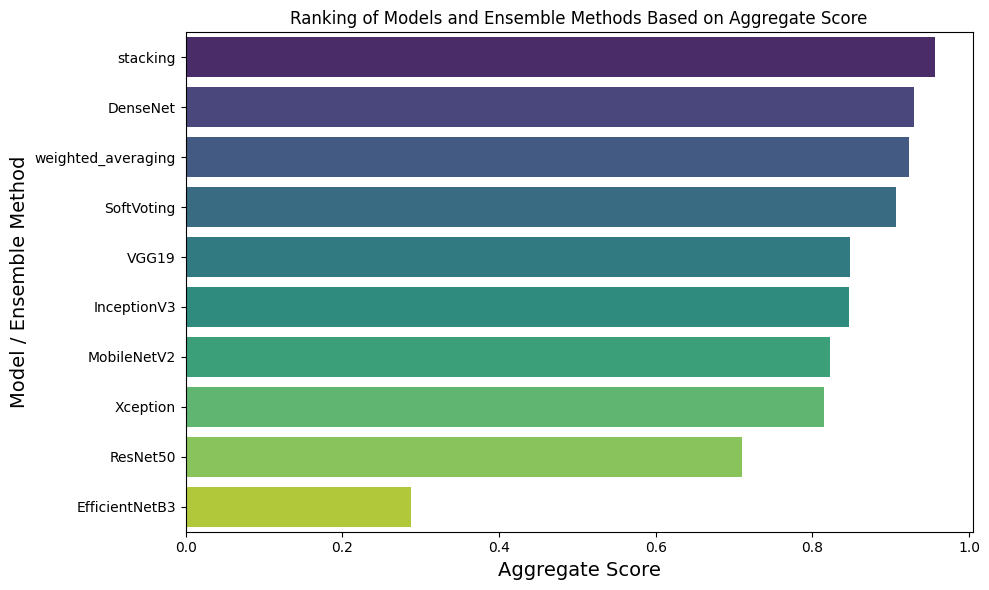

In [ ]:
# Create a new column that aggregates the scores
comparison_df['Aggregate_Score'] = comparison_df[["precision", "recall", "f1-score", "accuracy"]].mean(axis=1)

# Sort the models and ensembles by the aggregate score
sorted_comparison = comparison_df.sort_values(by='Aggregate_Score', ascending=False)

# Display the sorted comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate_Score', y='Model', data=sorted_comparison, palette='viridis')
plt.title('Ranking of Models and Ensemble Methods Based on Aggregate Score')
plt.xlabel('Aggregate Score', fontsize=14)
plt.ylabel('Model / Ensemble Method', fontsize=14)
plt.tight_layout()
plt.show()
